In [1]:
import numpy as np
import numpy.typing as nptyping
import pandas as pd
import matplotlib.pyplot as plt

# Datasets

## `square_simple`

In [2]:
square_train = pd.read_csv('data/regression/square-simple-training.csv').drop(columns='Unnamed: 0')
square_test = pd.read_csv('data/regression/square-simple-test.csv').drop(columns='Unnamed: 0')

In [3]:
print(square_train.shape)
print(square_test.shape)

(100, 2)
(100, 2)


In [4]:
square_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [5]:
square_train.describe()

,x,y
count,100.000000,100.000000
mean,0.335393,-30.558884
std,1.001218,96.260228
min,-1.499164,-129.988852
25%,-0.461426,-107.395163
50%,0.494938,-67.036576
75%,1.108129,37.700438
max,1.939860,208.675181


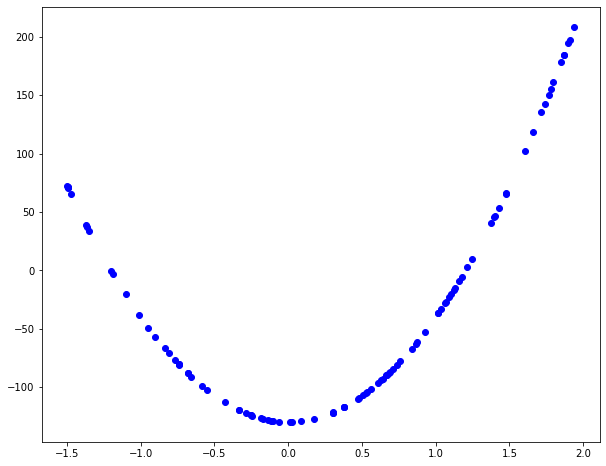

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(square_train['x'], square_train['y'], color='blue')
plt.show()

## `steps_large`

In [7]:
steps_train = pd.read_csv('data/regression/steps-large-training.csv').drop(columns='Unnamed: 0')
steps_test = pd.read_csv('data/regression/steps-large-test.csv').drop(columns='Unnamed: 0')

In [8]:
print(steps_train.shape)
print(steps_test.shape)

(10000, 2)
(1000, 2)


In [9]:
steps_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10000 non-null  float64
 1   y       10000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 156.4 KB


In [10]:
steps_train.describe()

,x,y
count,10000.000000,10000.000000
mean,0.255711,23.504000
std,1.017797,82.643844
min,-1.498693,-80.000000
25%,-0.633734,-80.000000
50%,0.271821,0.000000
75%,1.135860,80.000000
max,1.999734,160.000000


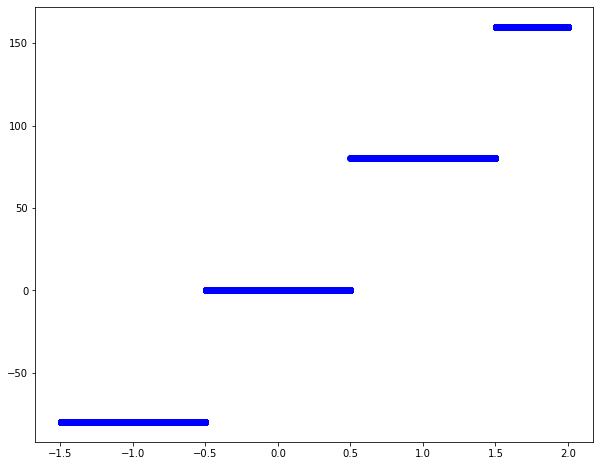

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(steps_train['x'], steps_train['y'], color='blue')
plt.show()

In [12]:
steps_train['y'].value_counts()

 80     2928
-80     2862
 0      2774
 160    1436
Name: y, dtype: int64

## Convert data to column arrays to prevent errors when predicting:

In [13]:
x_square_train = square_train['x'].to_numpy().reshape((100, 1))
y_square_train = square_train['y'].to_numpy().reshape((100, 1))
x_square_test = square_test['x'].to_numpy().reshape((100, 1))
y_square_test = square_test['y'].to_numpy().reshape((100, 1))

In [14]:
x_steps_train = steps_train['x'].to_numpy().reshape((10000, 1))
y_steps_train = steps_train['y'].to_numpy().reshape((10000, 1))
x_steps_test = steps_test['x'].to_numpy().reshape((1000, 1))
y_steps_test = steps_test['y'].to_numpy().reshape((1000, 1))

# Utility functions

## Sigmoid activation function

In [15]:
def sigmoid(x):
    return 1 / (np.exp(-x) + 1)

## Mean squared error

In [16]:
def mse(actual: nptyping.NDArray, predicted: nptyping.NDArray) -> float:
    n = len(actual)
    return (1/n) * np.sum((actual - predicted)**2)

# MLP implementation

In [17]:
class MLP:
    __slots__ = ['input_size', 'output_size', 'hidden_layers', 'activation_func', 'out_func', 'weights', 'biases']

    def __init__(self, input_size: int, hidden_layers_sizes: list[int], output_size: int, activation_func: callable, out_func: callable = None):
        self.input_size = input_size
        self.hidden_layers = hidden_layers_sizes
        self.output_size = output_size
        self.activation_func = activation_func
        if out_func is None:
            out_func = activation_func
        self.out_func = out_func
        
        self.weights = []
        self.biases = []

        # weigths are taken from normal distribution by default
        layers_sizes = [input_size, *hidden_layers_sizes, output_size]
        for i in range(len(layers_sizes) - 1):
            self.weights.append(
                np.random.normal(size=(layers_sizes[i], layers_sizes[i + 1]))
            )
        
        # biases are 0 by default
        for layer_size in layers_sizes[1:]:
            self.biases.append(
                np.zeros((1, layer_size))
            )

    @property
    def hidden_layers_count(self) -> int:
        return len(self.hidden_layers)
    
    def predict(self, x: nptyping.NDArray) -> nptyping.NDArray:
        for i in range(len(self.weights) - 1):
            x = self.activation_func(x @ self.weights[i] + self.biases[i])
        y = self.out_func(x @ self.weights[-1] + self.biases[-1])
        return y

# Predicting with default weights & biases

## One hidden layer with 5 neurons:

In [18]:
mlp_default_1 = MLP(1, [5], 1, sigmoid, lambda x: x)

In [19]:
pred_square_test = mlp_default_1.predict(x_square_test)
mse(y_square_test, pred_square_test)

8685.447609855546

In [20]:
pred_steps_test = mlp_default_1.predict(x_steps_test)
mse(y_steps_test, pred_steps_test)

7469.571449972653

## One hidden layer with 10 neurons:

In [21]:
mlp_default_2 = MLP(1, [5], 1, sigmoid, lambda x: x)

In [22]:
pred_square_test = mlp_default_2.predict(x_square_test)
mse(y_square_test, pred_square_test)

8852.502988519718

In [23]:
pred_steps_test = mlp_default_2.predict(x_steps_test)
mse(y_steps_test, pred_steps_test)

7442.300766363118

## Two hidden layers with 5 neurons each:

In [24]:
mlp_default_3 = MLP(1, [5, 5], 1, sigmoid, lambda x: x)

In [25]:
pred_square_test = mlp_default_3.predict(x_square_test)
mse(y_square_test, pred_square_test)

8525.61900985436

In [26]:
pred_steps_test = mlp_default_3.predict(x_steps_test)
mse(y_steps_test, pred_steps_test)

7578.1511880531

# Finding the best weights & biases for the `square_simple` dataset

## One layer with 5 neurons

In [27]:
mlp_square_1_5 = MLP(1, [5], 1, activation_func=sigmoid, out_func=lambda x: x)

### Manual random search

In [28]:
from numpy.random import Generator, PCG64

rng = Generator(PCG64(28))

best_weights = mlp_square_1_5.weights
best_biases = mlp_square_1_5.biases
min_mse_train = mse(y_square_train, mlp_square_1_5.predict(x_square_train))

for _ in range(100000):
    weights = [
        rng.uniform(-5, 5, size=(1, 5)),
        rng.uniform(-500, 500, size=(5, 1)),
    ]
    biases = [
        rng.uniform(-5, 5, size=(1, 5)),
        rng.uniform(-5, 5, size=(1, 1)),
    ]
    mlp_square_1_5.weights = weights
    mlp_square_1_5.biases = biases
    mse_train = mse(y_square_train, mlp_square_1_5.predict(x_square_train))
    if mse_train < min_mse_train:
        min_mse_train = mse_train
        best_weights = weights
        best_biases = biases

mlp_square_1_5.weights = best_weights
mlp_square_1_5.biases = best_biases
print(f'Min train MSE: {min_mse_train}')
print(f'Test MSE: {mse(y_square_test, mlp_square_1_5.predict(x_square_test))}')

Min train MSE: 93.5360860276389
Test MSE: 112.55978395299203


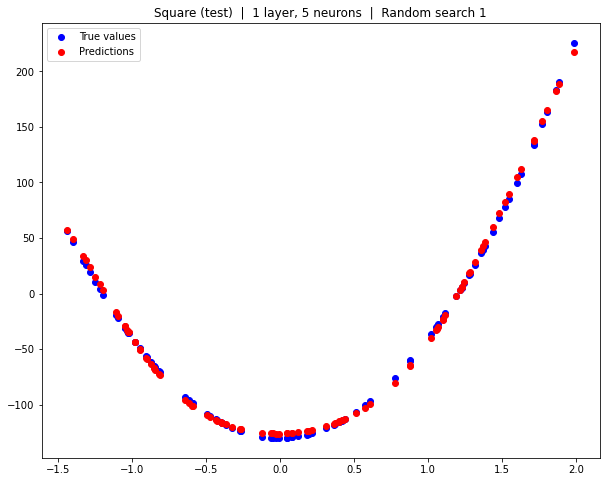

In [63]:
plt.figure(figsize=(10, 8))
plt.scatter(x_square_test, y_square_test, color='blue', label='True values')
plt.scatter(x_square_test, mlp_square_1_5.predict(x_square_test), color='red', label='Predictions')
plt.title('Square (test)  |  1 layer, 5 neurons  |  Random search 1')
plt.legend()
plt.show()

In [30]:
print(mlp_square_1_5.weights)
print(mlp_square_1_5.biases)

[array([[ 2.36519363,  0.46236685,  3.88193825, -3.16719003, -1.97584925]]), array([[ 247.58226823],
       [  49.83564008],
       [ 143.78282879],
       [ 319.54014225],
       [-189.09756009]])]
[array([[-4.58648227,  2.34494528, -3.82932527, -3.99427794,  4.29682267]]), array([[1.28273803]])]


### Second random search (around the values found by the first one):

In [31]:
rng = Generator(PCG64(3))

for _ in range(100000):
    weights = [
        np.array([[rng.uniform(2.2, 2.5), rng.uniform(0.5, 1), rng.uniform(2.8, 3.2), rng.uniform(-3.2, -2.8), rng.uniform(-2.1, -1.9)]]),
        np.array([
            [rng.uniform(250, 290)], 
            [rng.uniform(50, 70)], 
            [rng.uniform(140, 160)], 
            [rng.uniform(310, 330)], 
            [rng.uniform(-200, -190)],
        ]),
    ]
    biases = [
        np.array([rng.uniform(-4.7, -4.5), rng.uniform(2.2, 2.4), rng.uniform(-3.9, -3.6), rng.uniform(-3.9, -3.6), rng.uniform(4.1, 4.4)]),
        np.array([rng.uniform(1, 1.6)]),
    ]
    mlp_square_1_5.weights = weights
    mlp_square_1_5.biases = biases
    mse_train = mse(y_square_train, mlp_square_1_5.predict(x_square_train))
    if mse_train < min_mse_train:
        min_mse_train = mse_train
        best_weights = weights
        best_biases = biases

mlp_square_1_5.weights = best_weights
mlp_square_1_5.biases = best_biases
print(f'Min train MSE: {min_mse_train}')
print(f'Test MSE: {mse(y_square_test, mlp_square_1_5.predict(x_square_test))}')

Min train MSE: 8.56116124831894
Test MSE: 8.298135322118211


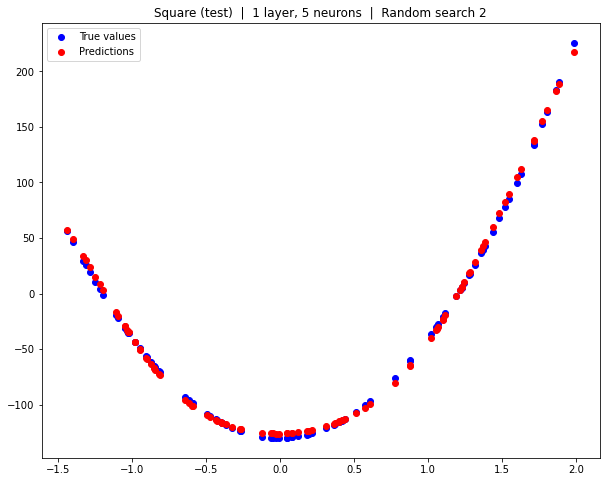

In [64]:
plt.figure(figsize=(10, 8))
plt.scatter(x_square_test, y_square_test, color='blue', label='True values')
plt.scatter(x_square_test, mlp_square_1_5.predict(x_square_test), color='red', label='Predictions')
plt.title('Square (test)  |  1 layer, 5 neurons  |  Random search 2')
plt.legend()
plt.show()

In [33]:
print(mlp_square_1_5.weights)
print(mlp_square_1_5.biases)

[array([[ 2.37210977,  0.5659331 ,  3.08571977, -2.92055572, -2.05003056]]), array([[ 256.75668624],
       [  55.46133004],
       [ 141.84503559],
       [ 320.44449791],
       [-195.23755257]])]
[array([-4.67824485,  2.28961114, -3.62076364, -3.61674852,  4.12095195]), array([1.34364959])]


## One layer with 10 neurons

In [34]:
mlp_square_1_10 = MLP(1, [10], 1, activation_func=sigmoid, out_func=lambda x: x)

### Manual random search

In [35]:
rng = Generator(PCG64(4))

best_weights = mlp_square_1_10.weights
best_biases = mlp_square_1_10.biases
min_mse_train = mse(y_square_train, mlp_square_1_10.predict(x_square_train))

for _ in range(100000):
    weights = [
        rng.uniform(-5, 5, size=(1, 10)),
        rng.uniform(-2000, 2000, size=(10, 1)),
    ]
    biases = [
        rng.uniform(-1, 1, size=(1, 10)),
        -130,
    ]
    mlp_square_1_10.weights = weights
    mlp_square_1_10.biases = biases
    mse_train = mse(y_square_train, mlp_square_1_10.predict(x_square_train))
    if mse_train < min_mse_train:
        min_mse_train = mse_train
        best_weights = weights
        best_biases = biases

mlp_square_1_10.weights = best_weights
mlp_square_1_10.biases = best_biases
print(f'Min train MSE: {min_mse_train}')
print(f'Test MSE: {mse(y_square_test, mlp_square_1_10.predict(x_square_test))}')

Min train MSE: 717.8298314448522
Test MSE: 673.2850747132572


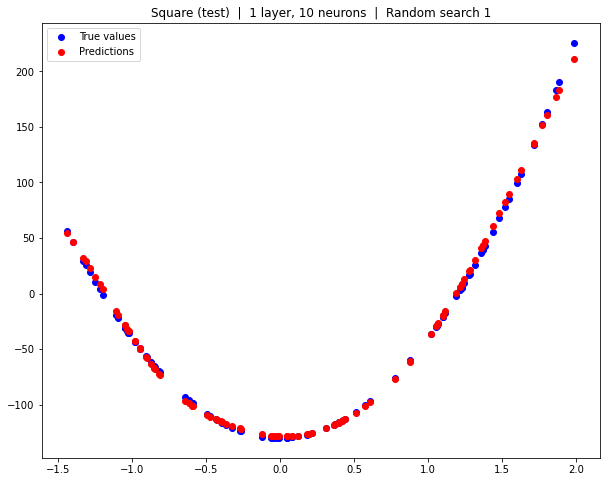

In [65]:
plt.figure(figsize=(10, 8))
plt.scatter(x_square_test, y_square_test, color='blue', label='True values')
plt.scatter(x_square_test, mlp_square_1_10.predict(x_square_test), color='red', label='Predictions')
plt.title('Square (test)  |  1 layer, 10 neurons  |  Random search 1')
plt.legend()
plt.show()

In [37]:
print(mlp_square_1_10.weights)
print(mlp_square_1_10.biases)

[array([[ 0.99421592, -0.78568669,  2.33459259, -2.29439298, -3.67384578,
        -1.74943047, -2.82595229,  0.20977814,  2.2767634 ,  1.95703157]]), array([[-1890.86437135],
       [ -564.74807527],
       [ 1653.01161679],
       [ 1528.66888345],
       [   74.91270225],
       [-1237.2014985 ],
       [  603.28470031],
       [  529.86826632],
       [   91.14809814],
       [  108.69425813]])]
[array([[ 0.9231069 , -0.03613695,  0.74397553, -0.70591735,  0.75637763,
         0.26804984, -0.41904844,  0.3488422 , -0.37511998, -0.72602769]]), -130]


### Second random search (narrowing down the search space):

In [38]:
rng = Generator(PCG64(14))

best_weights = mlp_square_1_10.weights
best_biases = mlp_square_1_10.biases
min_mse_train = mse(y_square_train, mlp_square_1_10.predict(x_square_train))

for _ in range(100000):
    weights = [
        np.array([[rng.uniform(1.85, 1.95), rng.uniform(-0.75, -0.65), rng.uniform(2.7, 2.8), rng.uniform(-1.3, -1.2), rng.uniform(-3.05, -2.95),
                   rng.uniform(-0.8, -0.7), rng.uniform(-3.6, -3.5), rng.uniform(0.5, 0.6), rng.uniform(0.68, 0.78), rng.uniform(1.05, 1.15)]]),
        np.array([
            [rng.uniform(-1695, -1685)],
            [rng.uniform(-895, -885)],
            [rng.uniform(1720, 1730)],
            [rng.uniform(1540, 1550)],
            [rng.uniform(55, 65)],
            [rng.uniform(-1360, -1350)],
            [rng.uniform(590, 600)],
            [rng.uniform(595, 605)],
            [rng.uniform(100, 110)], 
            [rng.uniform(155, 165)],
        ]),
    ]
    biases = [
        np.array([rng.uniform(0.55, 0.65), 0, rng.uniform(0.6, 0.7), rng.uniform(-1.1, -1), rng.uniform(1.4, 1.5),
                  rng.uniform(0, 0.1), rng.uniform(-0.7, -0.6), rng.uniform(0.55, 0.65), rng.uniform(-0.85, -0.75), rng.uniform(-1.5, -1.4)]),
        -130,
    ]
    mlp_square_1_10.weights = weights
    mlp_square_1_10.biases = biases
    mse_train = mse(y_square_train, mlp_square_1_10.predict(x_square_train))
    if mse_train < min_mse_train:
        min_mse_train = mse_train
        best_weights = weights
        best_biases = biases

mlp_square_1_10.weights = best_weights
mlp_square_1_10.biases = best_biases
print(f'Min train MSE: {min_mse_train}')
print(f'Test MSE: {mse(y_square_test, mlp_square_1_10.predict(x_square_test))}')

Min train MSE: 10.423483673042501
Test MSE: 8.848719043222072


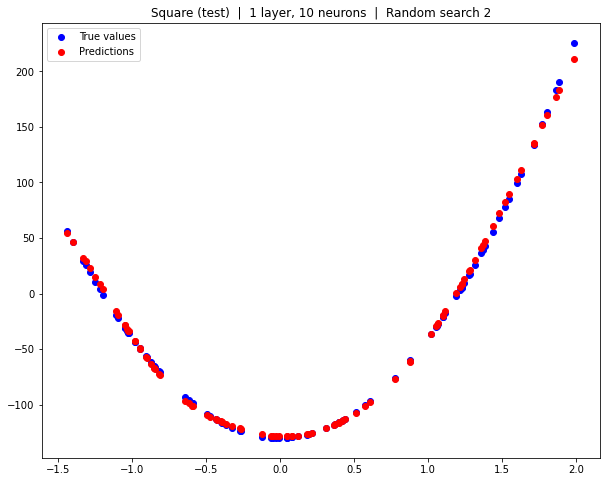

In [66]:
plt.figure(figsize=(10, 8))
plt.scatter(x_square_test, y_square_test, color='blue', label='True values')
plt.scatter(x_square_test, mlp_square_1_10.predict(x_square_test), color='red', label='Predictions')
plt.title('Square (test)  |  1 layer, 10 neurons  |  Random search 2')
plt.legend()
plt.show()

In [40]:
print(mlp_square_1_10.weights)
print(mlp_square_1_10.biases)

[array([[ 1.85025886, -0.73252545,  2.76641568, -1.27699638, -2.97562481,
        -0.73946077, -3.59269646,  0.56852445,  0.75210833,  1.09273298]]), array([[-1691.66099192],
       [ -888.92829888],
       [ 1720.19450433],
       [ 1540.3720655 ],
       [   64.12913806],
       [-1352.0231414 ],
       [  599.26314037],
       [  597.00738237],
       [  105.44936301],
       [  163.00573947]])]
[array([ 0.62800074,  0.        ,  0.69680435, -1.05625312,  1.48281615,
        0.06064766, -0.67391401,  0.57987519, -0.83001711, -1.46337398]), -130]


## Two layers with 5 neurons each

In [41]:
mlp_square_2_5 = MLP(1, [5, 5], 1, activation_func=sigmoid, out_func=lambda x: x)

In [42]:
mlp_square_2_5.weights

[array([[-1.66727583, -1.84660323, -0.37147557, -0.11313819,  0.7138911 ]]),
 array([[-0.09250991, -0.85672881,  0.38416224, -0.45793397, -0.43576839],
        [-0.61288077, -0.47310786, -0.65467507, -0.48171214,  0.37045607],
        [ 0.05117894,  0.15408194, -0.02292633, -0.07837466,  0.25264994],
        [ 0.27702159,  0.36249834, -1.36725348,  1.66493329, -0.16687124],
        [ 0.21689596,  1.68791188,  0.20969122,  1.12276586,  0.85420001]]),
 array([[-1.12838392],
        [-1.34722809],
        [ 1.26871032],
        [ 1.35038078],
        [-0.32831174]])]

In [43]:
mlp_square_2_5.biases

[array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0.]])]

### Manual random search

In [44]:
from numpy.random import Generator, PCG64

mlp_square_2_5 = MLP(1, [5, 5], 1, activation_func=sigmoid, out_func=lambda x: x)

rng = Generator(PCG64(4))

best_weights = mlp_square_2_5.weights
best_biases = mlp_square_2_5.biases
min_mse_train = mse(y_square_train, mlp_square_2_5.predict(x_square_train))

for _ in range(100000):
    weights = [
        rng.uniform(-1, 1, size=(1, 5)),
        rng.uniform(-5, 5, size=(5, 5)),
        rng.uniform(-1000, 1000, size=(5, 1)),
    ]
    biases = [
        np.zeros((1, 5)),
        np.zeros((1, 5)),
        -130,
    ]
    mlp_square_2_5.weights = weights
    mlp_square_2_5.biases = biases
    mse_train = mse(y_square_train, mlp_square_2_5.predict(x_square_train))
    if mse_train < min_mse_train:
        min_mse_train = mse_train
        best_weights = weights
        best_biases = biases

mlp_square_2_5.weights = best_weights
mlp_square_2_5.biases = best_biases
print(f'Min train MSE: {min_mse_train}')
print(f'Test MSE: {mse(y_square_test, mlp_square_2_5.predict(x_square_test))}')

Min train MSE: 454.86272838154235
Test MSE: 285.6003142031494


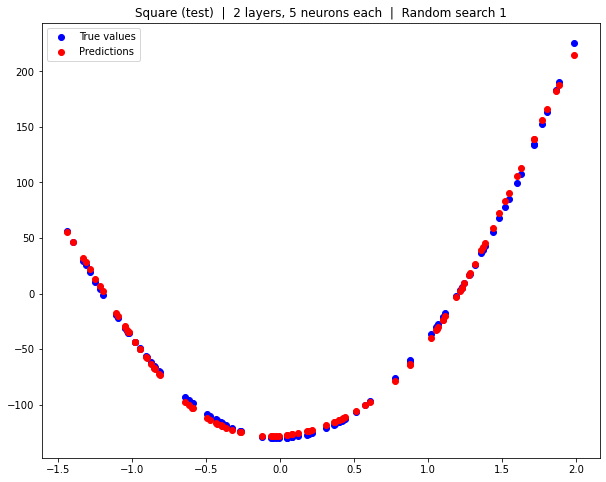

In [67]:
plt.figure(figsize=(10, 8))
plt.scatter(x_square_test, y_square_test, color='blue', label='True values')
plt.scatter(x_square_test, mlp_square_2_5.predict(x_square_test), color='red', label='Predictions')
plt.title('Square (test)  |  2 layers, 5 neurons each  |  Random search 1')
plt.legend()
plt.show()

### Second random search (narrowing down the search space):

In [46]:
rng = Generator(PCG64(3))

best_weights = mlp_square_2_5.weights
best_biases = mlp_square_2_5.biases
min_mse_train = mse(y_square_train, mlp_square_2_5.predict(x_square_train))

for _ in range(100000):
    weights = [
        np.array([[rng.uniform(-0.75, -0.65), rng.uniform(0, 0.1), rng.uniform(-0.8, -0.7), rng.uniform(0.1, 0.2), rng.uniform(1.5, 1.6)]]),
        np.array([
            [rng.uniform(32, 33), rng.uniform(1.2, 1.3), rng.uniform(-9.5, -8.5), rng.uniform(5, 6), rng.uniform(-3, -2)],
            [rng.uniform(-3.9, -3.8), rng.uniform(-2, -1.3), rng.uniform(1, 1.1), rng.uniform(-7.9, -7.4), rng.uniform(-7, -6)],
            [rng.uniform(-1, -0.6), rng.uniform(7.8, 7.9), rng.uniform(-5.7, -5.6), rng.uniform(-2.7, -2.6), rng.uniform(0.4, 0.5)],
            [rng.uniform(14, 15), rng.uniform(0, 1), rng.uniform(2.1, 2.3), rng.uniform(1.8, 2), rng.uniform(1.5, 1.7)],
            [rng.uniform(-4.1, -3.8), rng.uniform(1.1, 1.5), rng.uniform(1.35, 1.6), rng.uniform(-7.4, -7), rng.uniform(0.4, 1)],
        ]),
        np.array([
            [rng.uniform(34, 36)],
            [rng.uniform(-80, -70)],
            [rng.uniform(500, 510)],
            [rng.uniform(980, 992)],
            [rng.uniform(720, 735)],
        ]),
    ]
    biases = [
        np.zeros((1, 5)),
        np.zeros((1, 5)),
        -130,
    ]
    mlp_square_2_5.weights = weights
    mlp_square_2_5.biases = biases
    mse_train = mse(y_square_train, mlp_square_2_5.predict(x_square_train))
    if mse_train < min_mse_train:
        min_mse_train = mse_train
        best_weights = weights
        best_biases = biases

mlp_square_2_5.weights = best_weights
mlp_square_2_5.biases = best_biases
print(f'Min train MSE: {min_mse_train}')
print(f'Test MSE: {mse(y_square_test, mlp_square_2_5.predict(x_square_test))}')

Min train MSE: 7.7336806803415845
Test MSE: 8.553323357023704


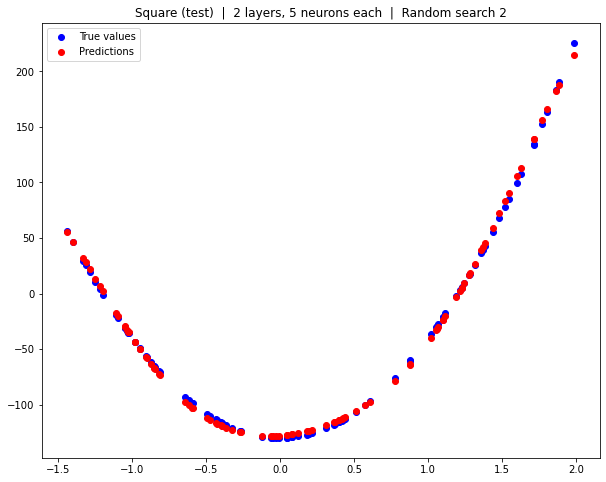

In [68]:
plt.figure(figsize=(10, 8))
plt.scatter(x_square_test, y_square_test, color='blue', label='True values')
plt.scatter(x_square_test, mlp_square_2_5.predict(x_square_test), color='red', label='Predictions')
plt.title('Square (test)  |  2 layers, 5 neurons each  |  Random search 2')
plt.legend()
plt.show()

In [48]:
print(mlp_square_2_5.weights)
print(mlp_square_2_5.biases)

[array([[-0.67502194,  0.0083781 , -0.7149193 ,  0.1438174 ,  1.53812413]]), array([[32.30978052,  1.29689551, -9.08925634,  5.89017655, -2.59076222],
       [-3.82550594, -1.36033539,  1.07867988, -7.66272235, -6.42391788],
       [-0.69810025,  7.80811593, -5.60430625, -2.60423797,  0.4077369 ],
       [14.45115248,  0.16617389,  2.26797616,  1.95678869,  1.59169839],
       [-3.81337972,  1.36140705,  1.50094112, -7.11611189,  0.89646041]]), array([[ 34.85776351],
       [-78.21531476],
       [503.00551701],
       [987.88742987],
       [733.98693467]])]
[array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), -130]


# Finding the best weights & biases for the `steps_large` dataset

## One layer with 5 neurons

### Manual random search

In [49]:
mlp_steps_1_5 = MLP(1, [5], 1, sigmoid, lambda x: x)

rng = Generator(PCG64(28))

best_weights = mlp_steps_1_5.weights
best_biases = mlp_steps_1_5.biases
min_mse_train = mse(y_steps_train, mlp_steps_1_5.predict(x_steps_train))

for _ in range(100000):
    weights = [
        np.array([[rng.uniform(470, 480), rng.uniform(450, 460), rng.uniform(-110, -100), rng.uniform(470, 480), rng.uniform(240, 250)]]),
        np.array([
            [rng.uniform(30, 40)], 
            [rng.uniform(80, 100)], 
            [rng.uniform(5, 15)], 
            [rng.uniform(40, 50)], 
            [rng.uniform(70, 90)]
        ]),
    ]
    biases = [
        np.array([rng.uniform(-240, -230), rng.uniform(220, 240), rng.uniform(-60, -50), rng.uniform(-240, -230), rng.uniform(-370, -360)]),
        np.array([rng.uniform(-100, -80)]),
    ]
    mlp_steps_1_5.weights = weights
    mlp_steps_1_5.biases = biases
    mse_train = mse(y_steps_train, mlp_steps_1_5.predict(x_steps_train))
    if np.isnan(mse_train):  # overflow encountered in exp
        continue
    if mse_train < min_mse_train:
        min_mse_train = mse_train
        best_weights = weights
        best_biases = biases

mlp_steps_1_5.weights = best_weights
mlp_steps_1_5.biases = best_biases
print(f'Min train MSE: {min_mse_train}')
print(f'Test MSE: {mse(y_steps_test, mlp_steps_1_5.predict(x_steps_test))}')

/tmp/ipykernel_8796/4281543206.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp(-x) + 1)


Min train MSE: 7.803143230143037
Test MSE: 8.641197247425971


/tmp/ipykernel_8796/4281543206.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp(-x) + 1)


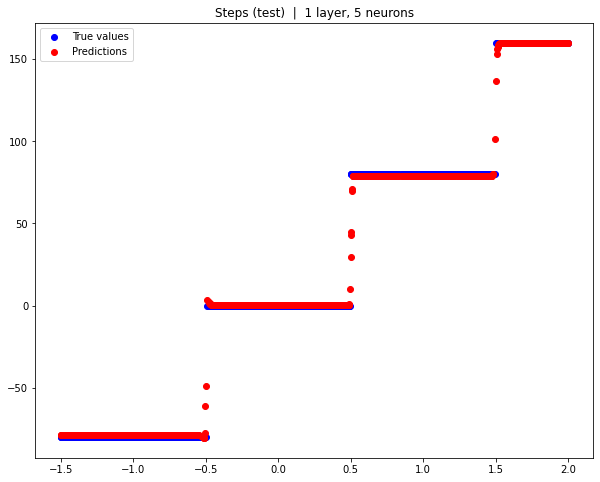

In [78]:
plt.figure(figsize=(10, 8))
plt.scatter(x_steps_test, y_steps_test, color='blue', label='True values')
plt.scatter(x_steps_test, mlp_steps_1_5.predict(x_steps_test), color='red', label='Predictions')
plt.title('Steps (test)  |  1 layer, 5 neurons')
plt.legend()
plt.show()

In [51]:
print(mlp_steps_1_5.weights)
print(mlp_steps_1_5.biases)

[array([[ 473.68722908,  459.52072546, -104.1728087 ,  474.4445001 ,
         240.02148346]]), array([[33.00292619],
       [92.22129034],
       [13.01431015],
       [45.58717933],
       [80.78567181]])]
[array([-238.73170513,  229.38369025,  -51.56655973, -237.20444173,
       -360.01686773]), array([-91.96272646])]


## One layer with 10 neurons

### Same weights & biases as with 5 neurons

In [52]:
mlp_steps_1_10 = MLP(1, [10], 1, sigmoid, lambda x: x)
mlp_steps_1_10.weights = [
    np.array([[473.68722908, 459.52072546, -104.1728087, 474.4445001, 240.02148346, 0, 0, 0, 0, 0]]), 
    np.array([
        [33.00292619],
        [92.22129034],
        [13.01431015],
        [45.58717933],
        [80.78567181],
        [0],
        [0],
        [0],
        [0],
        [0],
    ]),
]
mlp_steps_1_10.biases = [
    np.array([-238.73170513, 229.38369025, -51.56655973, -237.20444173, -360.01686773, 0, 0, 0, 0, 0]), 
    np.array([-91.96272646]),
]
print(f'Train MSE: {mse(y_steps_train, mlp_steps_1_10.predict(x_steps_train))}')
print(f'Test MSE: {mse(y_steps_test, mlp_steps_1_5.predict(x_steps_test))}')

Train MSE: 7.803143231395159
Test MSE: 8.641197247425971


/tmp/ipykernel_8796/4281543206.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp(-x) + 1)


/tmp/ipykernel_8796/4281543206.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp(-x) + 1)


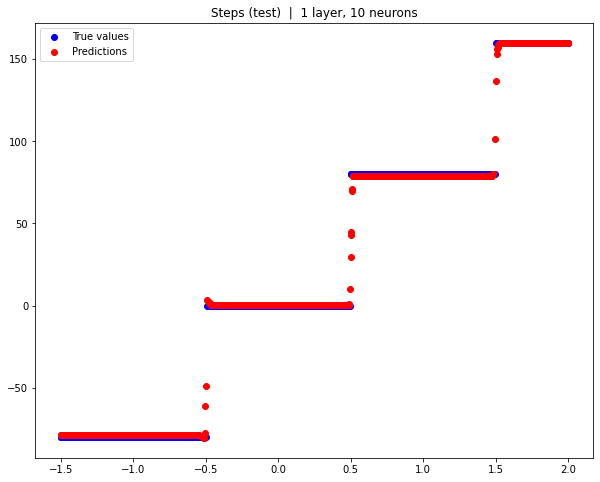

In [72]:
plt.figure(figsize=(10, 8))
plt.scatter(x_steps_test, y_steps_test, color='blue', label='True values')
plt.scatter(x_steps_test, mlp_steps_1_10.predict(x_steps_test), color='red', label='Predictions')
plt.title('Steps (test)  |  1 layer, 10 neurons')
plt.legend()
plt.show()

In [54]:
print(mlp_steps_1_10.weights)
print(mlp_steps_1_10.biases)

[array([[ 473.68722908,  459.52072546, -104.1728087 ,  474.4445001 ,
         240.02148346,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ]]), array([[33.00292619],
       [92.22129034],
       [13.01431015],
       [45.58717933],
       [80.78567181],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])]
[array([-238.73170513,  229.38369025,  -51.56655973, -237.20444173,
       -360.01686773,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ]), array([-91.96272646])]


## Two layers with 5 neurons each

### Manual random search

In [55]:
mlp_steps_2_5 = MLP(1, [5, 5], 1, sigmoid, lambda x: x)

rng = Generator(PCG64(19))

best_weights = mlp_steps_2_5.weights
best_biases = mlp_steps_2_5.biases
min_mse_train = mse(y_steps_train, mlp_steps_2_5.predict(x_steps_train))

for _ in range(100000):
    weights = [
        np.array([[rng.uniform(28, 30), rng.uniform(22, 23), rng.uniform(29, 30), rng.uniform(30, 32), rng.uniform(-18, -17)]]),
        np.array([
            [rng.uniform(43, 46), rng.uniform(-6, -5), rng.uniform(3, 4), rng.uniform(-5, -4), rng.uniform(-3, -2)],
            [rng.uniform(15, 16), rng.uniform(-3, -2), rng.uniform(11, 12), rng.uniform(-7, -6), rng.uniform(-3, -2)],
            [rng.uniform(8, 9), rng.uniform(-6.5, -5.5), rng.uniform(18, 20), rng.uniform(-7, -6), rng.uniform(-5, -4)],
            [rng.uniform(9, 10), rng.uniform(-8, -7), rng.uniform(30, 32), rng.uniform(-9, 7), rng.uniform(-3, -2)],
            [rng.uniform(-9, -8), rng.uniform(0, 1), rng.uniform(-14, -13), rng.uniform(53, 56), rng.uniform(-7, -6)],
        ]),
        np.array([
            [rng.uniform(80, 84)],
            [rng.uniform(3, 5)],
            [rng.uniform(77, 83)],
            [rng.uniform(-83, -77)],
            [rng.uniform(0, 2)],
        ]),
    ]
    biases = [
        np.array([[rng.uniform(13, 14), rng.uniform(-14, -13), rng.uniform(-16, -15), rng.uniform(-16, -15), rng.uniform(25, 26)]]),
        np.array([[rng.uniform(-8, -7), rng.uniform(0, 0.5), rng.uniform(-13, -12), rng.uniform(3, 4), rng.uniform(-6, -5)]]),
        rng.uniform(-2, -1),
    ]
    mlp_steps_2_5.weights = weights
    mlp_steps_2_5.biases = biases
    mse_train = mse(y_steps_train, mlp_steps_2_5.predict(x_steps_train))
    if np.isnan(mse_train):  # overflow encountered in exp
        continue
    if mse_train < min_mse_train:
        min_mse_train = mse_train
        best_weights = weights
        best_biases = biases

mlp_steps_2_5.weights = best_weights
mlp_steps_2_5.biases = best_biases
print(f'Min train MSE: {min_mse_train}')
print(f'Test MSE: {mse(y_steps_test, mlp_steps_2_5.predict(x_steps_test))}')

Min train MSE: 8.388729133774174
Test MSE: 6.526256742783879


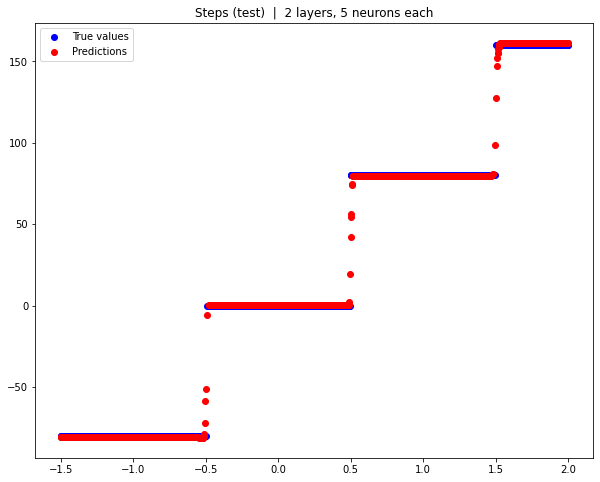

In [73]:
plt.figure(figsize=(10, 8))
plt.scatter(x_steps_test, y_steps_test, color='blue', label='True values')
plt.scatter(x_steps_test, mlp_steps_2_5.predict(x_steps_test), color='red', label='Predictions')
plt.title('Steps (test)  |  2 layers, 5 neurons each')
plt.legend()
plt.show()

In [57]:
print(mlp_steps_2_5.weights)
print(mlp_steps_2_5.biases)

[array([[ 28.25228289,  22.32085492,  29.59322235,  30.94347679,
        -17.86456131]]), array([[ 45.93704776,  -5.25950373,   3.12773996,  -4.86278763,
         -2.1179894 ],
       [ 15.71323868,  -2.26983447,  11.59337061,  -6.36729606,
         -2.50553623],
       [  8.75262329,  -6.09812251,  19.46046648,  -6.44217734,
         -4.25360254],
       [  9.37469897,  -7.37634491,  31.29186717,  -0.95248798,
         -2.88619622],
       [ -8.76518864,   0.99727884, -13.2945149 ,  54.07095883,
         -6.23279788]]), array([[ 83.43456494],
       [  4.08821563],
       [ 79.6483918 ],
       [-81.61418186],
       [  0.64340577]])]
[array([[ 13.45628253, -13.8603416 , -15.68761038, -15.40165449,
         25.91947642]]), array([[-7.24516590e+00,  9.21739135e-03, -1.24111535e+01,
         3.15884066e+00, -5.33507376e+00]]), -1.6837152024501185]
